In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, AdaBoostRegressor
from sklearn.svm import LinearSVR, SVR
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor

In [2]:
Transactions_csv = pd.read_csv('Transactions.csv')
Transactions_csv = Transactions_csv.dropna()
Transactions_csv = Transactions_csv.drop(['Date_and_time_of_unloading'], axis=1)
# Data_per_product = Transactions_csv[['Product_code', 'Profit']]
Data_per_product = Transactions_csv.groupby('Product_code')['Profit'].sum().reset_index()
Product_csv = pd.read_csv('Product_range.csv')
Info = pd.merge(Product_csv, Transactions_csv, on='Product_code')
# Info = Info.dropna()
Info.to_csv("Completa.csv")
print(Transactions_csv.shape)
print(Transactions_csv.shape)
print(Info)

(38297, 7)
(38297, 7)
       Product_code Vendor_code  \
0              5028         NaN   
1              5028         NaN   
2              5028         NaN   
3              4846         NaN   
4              4846         NaN   
...             ...         ...   
38292          1861         NaN   
38293          1861         NaN   
38294          4724         NaN   
38295          4724         NaN   
38296          4724         NaN   

                                                  Name  Retail_price  \
0                             1 Symbiotica Apple 0.375         300.0   
1                             1 Symbiotica Apple 0.375         300.0   
2                             1 Symbiotica Apple 0.375         300.0   
3      1 Symbiotica Hard Kombucha Renegade Aronia 0.33         200.0   
4      1 Symbiotica Hard Kombucha Renegade Aronia 0.33         200.0   
...                                                ...           ...   
38292              Stoun Imperial Rashn Stout Barrel 

In [33]:
import plotly.graph_objects as go
import plotly.express as px

df2 = pd.read_csv('Transactions.csv')
df2 = df2.dropna()


most_profitable = Info.sort_values('Profit', ascending=False)
Vendors_profit =  most_profitable[['Vendor_code', 'Profit']]
most_profitable = most_profitable[['Product_code','Profit', 'Name']]
Vendors_profit = Vendors_profit.dropna()
# teste = most_profitable.groupby('Name')['Profit'].sum().reset_index()
Vendors_profit = Vendors_profit.groupby('Vendor_code')['Profit'].sum().reset_index()
Vendors_profit = Vendors_profit.sort_values('Profit', ascending=False)
# print(Vendors_profit)
# print(teste)
# print(teste.shape)
negative_profit = most_profitable.loc[most_profitable['Profit'] < 0]

positive_profit = most_profitable.loc[most_profitable['Profit'] > 0]
positive_profit = positive_profit.groupby('Name')['Profit'].sum().reset_index()
positive_profit = positive_profit.sort_values('Profit', ascending=False)


fig = px.histogram(positive_profit[:100], x="Name", y='Profit',barmode='relative',marginal='box', title='Distribution of the profit per product (top 100)', width=1200, height=600 ,template='plotly_dark', color='Name')
fig.update_layout(xaxis={'title': '', 'tickmode': 'array', 'tickvals': []})
fig.show()


fig = px.histogram(df2, x='Date_and_time_of_unloading', y='Profit',barmode='relative',marginal='box', title='Distribution of the profit relative to the date and time of unloading', width=1200, height=600 ,template='plotly_dark')
fig.show()

color_scale = px.colors.sequential.Viridis  # Definir escala de cores
midpoint =50 # Ponto médio para a escala de cores



# Ajustar tamanho da coluna com nomes


total_lucro = Vendors_profit['Profit'].sum()
Vendors_profit['Percentage'] = Vendors_profit['Profit'] / total_lucro * 100
Vendors_profit.loc[Vendors_profit['Percentage'] < 1, 'Vendor_code'] = 'Others'
Vendors_profit = Vendors_profit.groupby('Vendor_code').sum().reset_index()
Vendors_profit = Vendors_profit.sort_values('Percentage', ascending=False)
Top_Vendors_profit = Vendors_profit.drop(Vendors_profit.loc[Vendors_profit['Vendor_code'] == 'Others'].index)


fig = px.pie(Top_Vendors_profit, names='Vendor_code', values='Percentage', template='plotly_dark', title='Vendedores representatividade no lucro maior que 1%')
fig.update_traces(hovertemplate='<b>%{label}</b><br>%{percent}', textinfo='none')
fig.show()
print(Vendors_profit)
print("número total de vendedores relevantes:", Vendors_profit.shape[0])


         Vendor_code      Profit  Percentage
12            Others  6542252.36   25.173392
7               Jaws  3173897.83   12.212579
0            AF Brew  1702923.36    6.552538
21   Weihenstephaner  1439692.31    5.539673
24           Zagovor  1376002.69    5.294607
15           Saldens  1055319.21    4.060676
20         Verhaeghe  1049291.41    4.037482
16  Schneider Weisse   947809.51    3.646998
3            BrewDog   845102.55    3.251800
2        Big Village   742653.34    2.857594
1            Bakunin   711123.85    2.736275
23           XP Brew   617862.49    2.377422
9          Naparbier   586473.57    2.256643
13        Red Button   576434.81    2.218016
18        Stamm Beer   553755.38    2.130750
5           Hausmann   522527.92    2.010592
4             Gaffel   517925.30    1.992882
11         Ostrovica   504229.60    1.940183
6             Huyghe   461432.65    1.775509
8          Mikkeller   419914.52    1.615754
17           Sobolev   380637.08    1.464622
22        

<AxesSubplot: >

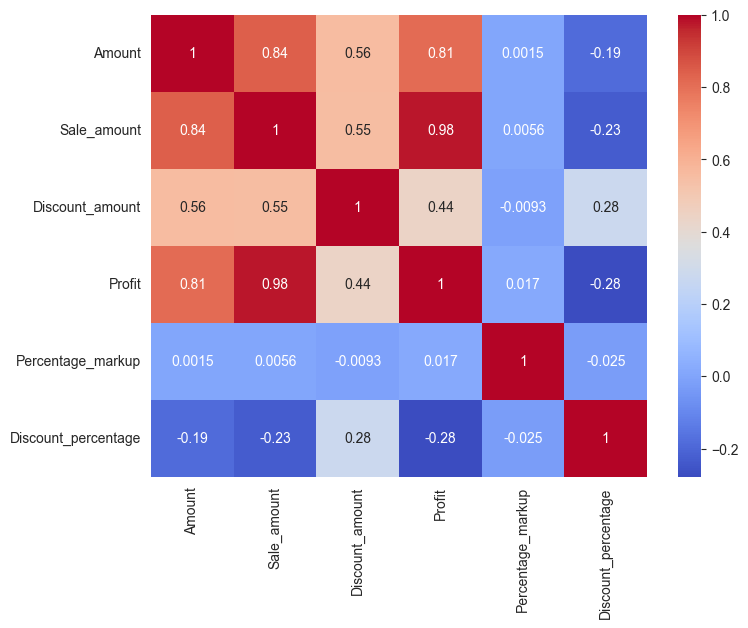

In [40]:
import seaborn as sns
Transactions_csv = pd.read_csv('Transactions.csv')
Transactions_csv = Transactions_csv.dropna()
Transactions_csv = Transactions_csv.drop(['Date_and_time_of_unloading', 'Product_code'], axis=1)

sns.set_style('darkgrid')
corr = Transactions_csv.corr()
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(corr, annot=True,cmap='coolwarm', ax=ax)

In [91]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
# Transactions_csv = pd.DataFrame(scaler.fit_transform(Transactions_csv),columns= Transactions_csv.columns)
# print(Transactions_csv.head())
X = Transactions_csv.drop(['Profit'], 1)
X = pd.DataFrame(scaler.fit_transform(X), columns= X.columns)
# print(X)
Transactions_csv['Profit']= scaler.fit_transform(Transactions_csv[['Profit']])
y = Transactions_csv['Profit']
# print(y)
X_train, X_test, y_train, y_test =train_test_split(X,y, test_size= 0.20, random_state=42)

         Amount  Sale_amount  Discount_amount  Percentage_markup  \
0      0.020078     0.009372         0.014396           0.001610   
1      0.020078     0.021735         0.001709           0.002869   
2      0.009871     0.010821         0.003424           0.002135   
3      0.020078     0.018980         0.009552           0.002156   
4      0.009871     0.005018         0.007712           0.001393   
...         ...          ...              ...                ...   
38292  0.020078     0.006891         0.014609           0.001740   
38293  0.040493     0.015705         0.013981           0.002349   
38294  0.060908     0.032235         0.005090           0.003338   
38295  0.020078     0.009548         0.005090           0.003215   
38296  0.020078     0.009832         0.004280           0.003056   

       Discount_percentage  
0                 0.350551  
1                 0.026827  
2                 0.100000  
3                 0.150250  
4                 0.350551  
...      

In [92]:
#regressão com todos os atributos disponíveis
regr = LinearRegression()
y_pred = regr.fit(X_train, y_train).predict(X_test)

print("Mean squared error: %.f" % mean_squared_error(y_test, y_pred))
print("R Score: %.2f" % r2_score(y_test, y_pred))
print("Mean Absolute Error %.2f" % mean_absolute_error(y_test, y_pred))
print("Mean Absolute Percentage Error %.2f"% mean_absolute_percentage_error(y_test, y_pred))

Mean squared error: 0
R Score: 0.97
Mean Absolute Error 0.00
Mean Absolute Percentage Error 0.01


In [93]:
LinearRegression_results =[]
regr = LinearRegression()
y_pred = regr.fit(X_train, y_train).predict(X_test)

LinearRegression_results.append(mean_squared_error(y_test, y_pred))
LinearRegression_results.append(r2_score(y_test, y_pred))
LinearRegression_results.append(mean_absolute_error(y_test, y_pred))
LinearRegression_results.append(mean_absolute_percentage_error(y_test, y_pred))

In [94]:
import warnings
warnings.filterwarnings("ignore")

#regressão com todos os atributos disponíveis
regr = LinearRegression().fit(X_train, y_train)
y_pred = regr.predict(X_test)
print("Linear - error: %.2f" % mean_squared_error(y_test, y_pred))
print("R Score: %.2f" % r2_score(y_test, y_pred))
print("Mean Absolute Error %.2f"% mean_absolute_error(y_test, y_pred))
print("Mean Absolute Percentage Error %.2f"% mean_absolute_percentage_error(y_test, y_pred))
print("Parâmetros:", *regr.coef_)

#########

regRidge = Ridge(alpha=0).fit(X_train, y_train)
y_pred = regRidge.predict(X_test)
print("\nRidge alpha=0.0 - error: %.2f" % mean_squared_error(y_test, y_pred))
print("R Score: %.2f" % r2_score(y_test, y_pred))
print("Mean Absolute Error %.2f"% mean_absolute_error(y_test, y_pred))
print("Mean Absolute Percentage Error %.2f"% mean_absolute_percentage_error(y_test, y_pred))

regRidge = Ridge(alpha=0.5).fit(X_train, y_train)
y_pred = regRidge.predict(X_test)
print("Ridge alpha=0.5 - error: %.2f" % mean_squared_error(y_test, y_pred))
print("R Score: %.2f" % r2_score(y_test, y_pred))
print("Mean Absolute Error %.2f"% mean_absolute_error(y_test, y_pred))
print("Mean Absolute Percentage Error %.2f"% mean_absolute_percentage_error(y_test, y_pred))

regRidge = Ridge(alpha=1).fit(X_train, y_train)
y_pred = regRidge.predict(X_test)
print("Ridge alpha=1.0 - error: %.2f" % mean_squared_error(y_test, y_pred))
print("R Score: %.2f" % r2_score(y_test, y_pred))
print("Mean Absolute Error %.2f"% mean_absolute_error(y_test, y_pred))
print("Mean Absolute Percentage Error %.2f"% mean_absolute_percentage_error(y_test, y_pred))

regRidge = Ridge(alpha=2).fit(X_train, y_train)
y_pred = regRidge.predict(X_test)
print("Ridge alpha=2.0 - error: %.2f" % mean_squared_error(y_test, y_pred))
print("R Score: %.2f" % r2_score(y_test, y_pred))
print("Mean Absolute Error %.2f"% mean_absolute_error(y_test, y_pred))
print("Mean Absolute Percentage Error %.2f"% mean_absolute_percentage_error(y_test, y_pred))
print("Parâmetros:", *regRidge.coef_)

Linear - error: 0.00
R Score: 0.97
Mean Absolute Error 0.00
Mean Absolute Percentage Error 0.01
Parâmetros: 0.007839250778582014 0.7940522561399158 -0.28644098616803704 0.0254973876081198 0.003604032401080093

Ridge alpha=0.0 - error: 0.00
R Score: 0.97
Mean Absolute Error 0.00
Mean Absolute Percentage Error 0.01
Ridge alpha=0.5 - error: 0.00
R Score: 0.97
Mean Absolute Error 0.00
Mean Absolute Percentage Error 0.01
Ridge alpha=1.0 - error: 0.00
R Score: 0.97
Mean Absolute Error 0.00
Mean Absolute Percentage Error 0.01
Ridge alpha=2.0 - error: 0.00
R Score: 0.97
Mean Absolute Error 0.00
Mean Absolute Percentage Error 0.01
Parâmetros: 0.046572825322629255 0.7027838974722797 -0.18409451105377975 0.01978529987609427 -0.003289423523256976


In [95]:
ridge_results = []
regRidge = Ridge(alpha=2).fit(X_train, y_train)
y_pred = regRidge.predict(X_test)
ridge_results.append(mean_squared_error(y_test, y_pred))
ridge_results.append(r2_score(y_test, y_pred))
ridge_results.append(mean_absolute_error(y_test, y_pred))
ridge_results.append(mean_absolute_percentage_error(y_test, y_pred))
print("Parâmetros:", *regRidge.coef_)

Parâmetros: 0.046572825322629255 0.7027838974722797 -0.18409451105377975 0.01978529987609427 -0.003289423523256976


In [96]:
regLasso = Lasso(alpha=0).fit(X_train, y_train)
y_pred = regLasso.predict(X_test)
print("\nLasso alpha=0.0 - error: %.2f" % mean_squared_error(y_test, y_pred))
print("R Score: %.2f" % r2_score(y_test, y_pred))
print("Mean Absolute Error %.2f"% mean_absolute_error(y_test, y_pred))
print("Mean Absolute Percentage Error %.2f"% mean_absolute_percentage_error(y_test, y_pred))

regLasso = Lasso(alpha=0.5).fit(X_train, y_train)
y_pred = regLasso.predict(X_test)
print("Lasso alpha=0.5 - error: %.2f" % mean_squared_error(y_test, y_pred))
print("R Score: %.2f" % r2_score(y_test, y_pred))
print("Mean Absolute Error %.2f"% mean_absolute_error(y_test, y_pred))
print("Mean Absolute Percentage Error %.2f"% mean_absolute_percentage_error(y_test, y_pred))

regLasso = Lasso(alpha=1).fit(X_train, y_train)
y_pred = regLasso.predict(X_test)
print("Lasso alpha=1.0 - error: %.2f" % mean_squared_error(y_test, y_pred))
print("R Score: %.2f" % r2_score(y_test, y_pred))
print("Mean Absolute Error %.2f"% mean_absolute_error(y_test, y_pred))
print("Mean Absolute Percentage Error %.2f"% mean_absolute_percentage_error(y_test, y_pred))

regLasso = Lasso(alpha=2).fit(X_train, y_train)
y_pred = regLasso.predict(X_test)
print("Lasso alpha=2.0 - error: %.2f" % mean_squared_error(y_test, y_pred))
print("R Score: %.2f" % r2_score(y_test, y_pred))
print("Mean Absolute Error %.2f"% mean_absolute_error(y_test, y_pred))
print("Mean Absolute Percentage Error %.2f"% mean_absolute_percentage_error(y_test, y_pred))
print("Parâmetros:", *regLasso.coef_)

regLasso = Lasso(alpha=4).fit(X_train, y_train)
y_pred = regLasso.predict(X_test)
print("Lasso alpha=4.0 - error: %.2f" % mean_squared_error(y_test, y_pred))
print("R Score: %.2f" % r2_score(y_test, y_pred))
print("Mean Absolute Error %.2f"% mean_absolute_error(y_test, y_pred))
print("Mean Absolute Percentage Error %.2f"% mean_absolute_percentage_error(y_test, y_pred))
print("Parâmetros:", *regLasso.coef_)



Lasso alpha=0.0 - error: 0.00
R Score: 0.97
Mean Absolute Error 0.00
Mean Absolute Percentage Error 0.01
Lasso alpha=0.5 - error: 0.00
R Score: -0.00
Mean Absolute Error 0.02
Mean Absolute Percentage Error 0.07
Lasso alpha=1.0 - error: 0.00
R Score: -0.00
Mean Absolute Error 0.02
Mean Absolute Percentage Error 0.07
Lasso alpha=2.0 - error: 0.00
R Score: -0.00
Mean Absolute Error 0.02
Mean Absolute Percentage Error 0.07
Parâmetros: 0.0 0.0 0.0 0.0 -0.0
Lasso alpha=4.0 - error: 0.00
R Score: -0.00
Mean Absolute Error 0.02
Mean Absolute Percentage Error 0.07
Parâmetros: 0.0 0.0 0.0 0.0 -0.0


In [97]:
lasso_results = []
regLasso = Lasso(alpha=4).fit(X_train, y_train)
y_pred = regLasso.predict(X_test)
lasso_results.append(mean_squared_error(y_test, y_pred))
lasso_results.append(r2_score(y_test, y_pred))
lasso_results.append(mean_absolute_error(y_test, y_pred))
lasso_results.append(mean_absolute_percentage_error(y_test, y_pred))

In [98]:
regElastic = ElasticNet(alpha=0).fit(X_train, y_train)
y_pred = regElastic.predict(X_test)
print("\nElastic alpha=0.0 - error: %.2f" % mean_squared_error(y_test, y_pred))
print("R Score: %.2f" % r2_score(y_test, y_pred))
print("Mean Absolute Error %.2f"% mean_absolute_error(y_test, y_pred))
print("Mean Absolute Percentage Error %.2f"% mean_absolute_percentage_error(y_test, y_pred))

regElastic = ElasticNet(alpha=1, l1_ratio=0).fit(X_train, y_train)
y_pred = regElastic.predict(X_test)
print("Elastic (Gamma=0 - Ridge) - error: %.2f" % mean_squared_error(y_test, y_pred))
print("R Score: %.2f" % r2_score(y_test, y_pred))
print("Mean Absolute Error %.2f"% mean_absolute_error(y_test, y_pred))
print("Mean Absolute Percentage Error %.2f"% mean_absolute_percentage_error(y_test, y_pred))

regElastic = ElasticNet(alpha=1, l1_ratio=0.5).fit(X_train, y_train)
y_pred = regElastic.predict(X_test)
print("Elastic (Gamma=0.5)       - error: %.2f" % mean_squared_error(y_test, y_pred))
print("R Score: %.2f" % r2_score(y_test, y_pred))
print("Mean Absolute Error %.2f"% mean_absolute_error(y_test, y_pred))
print("Mean Absolute Percentage Error %.2f"% mean_absolute_percentage_error(y_test, y_pred))

regElastic = ElasticNet(alpha=1, l1_ratio=1).fit(X_train, y_train)
y_pred = regElastic.predict(X_test)
print("Elastic (Gamma=1)       - error: %.2f" % mean_squared_error(y_test, y_pred))
print("R Score: %.2f" % r2_score(y_test, y_pred))
print("Mean Absolute Error %.2f"% mean_absolute_error(y_test, y_pred))
print("Mean Absolute Percentage Error %.2f"% mean_absolute_percentage_error(y_test, y_pred))


Elastic alpha=0.0 - error: 0.00
R Score: 0.97
Mean Absolute Error 0.00
Mean Absolute Percentage Error 0.01
Elastic (Gamma=0 - Ridge) - error: 0.00
R Score: 0.01
Mean Absolute Error 0.02
Mean Absolute Percentage Error 0.07
Elastic (Gamma=0.5)       - error: 0.00
R Score: -0.00
Mean Absolute Error 0.02
Mean Absolute Percentage Error 0.07
Elastic (Gamma=1)       - error: 0.00
R Score: -0.00
Mean Absolute Error 0.02
Mean Absolute Percentage Error 0.07


In [99]:
elastic_results = []
regElastic = ElasticNet(alpha=1, l1_ratio=1).fit(X_train, y_train)
y_pred = regElastic.predict(X_test)
elastic_results.append(mean_squared_error(y_test, y_pred))
elastic_results.append(r2_score(y_test, y_pred))
elastic_results.append(mean_absolute_error(y_test, y_pred))
elastic_results.append(mean_absolute_percentage_error(y_test, y_pred))

In [100]:
y_pred = LinearSVR(epsilon = 0.5).fit(X_train,y_train).predict(X_test)
print("Mean squared error (epsilon=0.5): %.2f" % mean_squared_error(y_test, y_pred))
print("R Score (epsilon=0.5): %.2f" % r2_score(y_test, y_pred))
print("Mean Absolute Error %.2f"% mean_absolute_error(y_test, y_pred))
print("Mean Absolute Percentage Error %.2f"% mean_absolute_percentage_error(y_test, y_pred))

y_pred = LinearSVR(epsilon = 1.0).fit(X_train,y_train).predict(X_test)
print("\nMean squared error (epsilon=1.0): %.2f" % mean_squared_error(y_test, y_pred))
print("R Score (epsilon=1.0): %.2f" % r2_score(y_test, y_pred))
print("Mean Absolute Error %.2f"% mean_absolute_error(y_test, y_pred))
print("Mean Absolute Percentage Error %.2f"% mean_absolute_percentage_error(y_test, y_pred))

y_pred = LinearSVR(epsilon = 1.5).fit(X_train,y_train).predict(X_test)
print("\nMean squared error (epsilon=1.5): %.2f" % mean_squared_error(y_test, y_pred))
print("R Score (epsilon=1.5): %.2f" % r2_score(y_test, y_pred))
print("Mean Absolute Error %.2f"% mean_absolute_error(y_test, y_pred))
print("Mean Absolute Percentage Error %.2f"% mean_absolute_percentage_error(y_test, y_pred))

y_pred = LinearSVR(epsilon = 15).fit(X_train,y_train).predict(X_test)
print("\nMean squared error (epsilon=15): %.2f" % mean_squared_error(y_test, y_pred))
print("R Score (epsilon=15): %.2f" % r2_score(y_test, y_pred))
print("Mean Absolute Error %.2f"% mean_absolute_error(y_test, y_pred))
print("Mean Absolute Percentage Error %.2f"% mean_absolute_percentage_error(y_test, y_pred))

Mean squared error (epsilon=0.5): 0.00
R Score (epsilon=0.5): -0.32
Mean Absolute Error 0.03
Mean Absolute Percentage Error 0.14

Mean squared error (epsilon=1.0): 0.06
R Score (epsilon=1.0): -47.20
Mean Absolute Error 0.24
Mean Absolute Percentage Error 1.00

Mean squared error (epsilon=1.5): 0.06
R Score (epsilon=1.5): -47.20
Mean Absolute Error 0.24
Mean Absolute Percentage Error 1.00

Mean squared error (epsilon=15): 0.06
R Score (epsilon=15): -47.20
Mean Absolute Error 0.24
Mean Absolute Percentage Error 1.00


In [101]:
LinearSVR_results = []
y_pred = LinearSVR(epsilon = 0.5).fit(X_train,y_train).predict(X_test)
LinearSVR_results.append(mean_squared_error(y_test, y_pred))
LinearSVR_results.append(r2_score(y_test, y_pred))
LinearSVR_results.append(mean_absolute_error(y_test, y_pred))
LinearSVR_results.append(mean_absolute_percentage_error(y_test, y_pred))

In [102]:
y_pred = DecisionTreeRegressor(max_depth=2).fit(X_train,y_train).predict(X_test)
print("Mean squared error (max_depth=2): %.2f" % mean_squared_error(y_test, y_pred))
print("R Score (max_depth=2): %.2f" % r2_score(y_test, y_pred))
print("Mean Absolute Error %.2f"% mean_absolute_error(y_test, y_pred))
print("Mean Absolute Percentage Error %.2f"% mean_absolute_percentage_error(y_test, y_pred))

y_pred = DecisionTreeRegressor(max_depth=5).fit(X_train,y_train).predict(X_test)
print("\nMean squared error (max_depth=5): %.2f" % mean_squared_error(y_test, y_pred))
print("R Score (max_depth=5): %.2f" % r2_score(y_test, y_pred))
print("Mean Absolute Error %.2f"% mean_absolute_error(y_test, y_pred))
print("Mean Absolute Percentage Error %.2f"% mean_absolute_percentage_error(y_test, y_pred))

y_pred = DecisionTreeRegressor(max_depth=10).fit(X_train,y_train).predict(X_test)
print("\nMean squared error (max_depth=10): %.2f" % mean_squared_error(y_test, y_pred))
print("R Score (max_depth=10): %.2f" % r2_score(y_test, y_pred))
print("Mean Absolute Error %.2f"% mean_absolute_error(y_test, y_pred))
print("Mean Absolute Percentage Error %.2f"% mean_absolute_percentage_error(y_test, y_pred))

y_pred = DecisionTreeRegressor().fit(X_train,y_train).predict(X_test)
print("\nMean squared error (max_depth= MAX): %.2f" % mean_squared_error(y_test, y_pred))
print("R Score (max_depth=MAX): %.2f" % r2_score(y_test, y_pred))
print("Mean Absolute Error %.2f"% mean_absolute_error(y_test, y_pred))
print("Mean Absolute Percentage Error %.2f" % mean_absolute_percentage_error(y_test, y_pred))

Mean squared error (max_depth=2): 0.00
R Score (max_depth=2): 0.82
Mean Absolute Error 0.01
Mean Absolute Percentage Error 0.03

Mean squared error (max_depth=5): 0.00
R Score (max_depth=5): 0.98
Mean Absolute Error 0.00
Mean Absolute Percentage Error 0.01

Mean squared error (max_depth=10): 0.00
R Score (max_depth=10): 0.99
Mean Absolute Error 0.00
Mean Absolute Percentage Error 0.00

Mean squared error (max_depth= MAX): 0.00
R Score (max_depth=MAX): 1.00
Mean Absolute Error 0.00
Mean Absolute Percentage Error 0.00


In [103]:
DecisionTree_results = []
y_pred = DecisionTreeRegressor().fit(X_train,y_train).predict(X_test)
DecisionTree_results.append(mean_squared_error(y_test, y_pred))
DecisionTree_results.append(r2_score(y_test, y_pred))
DecisionTree_results.append(mean_absolute_error(y_test, y_pred))
DecisionTree_results.append(mean_absolute_percentage_error(y_test, y_pred))

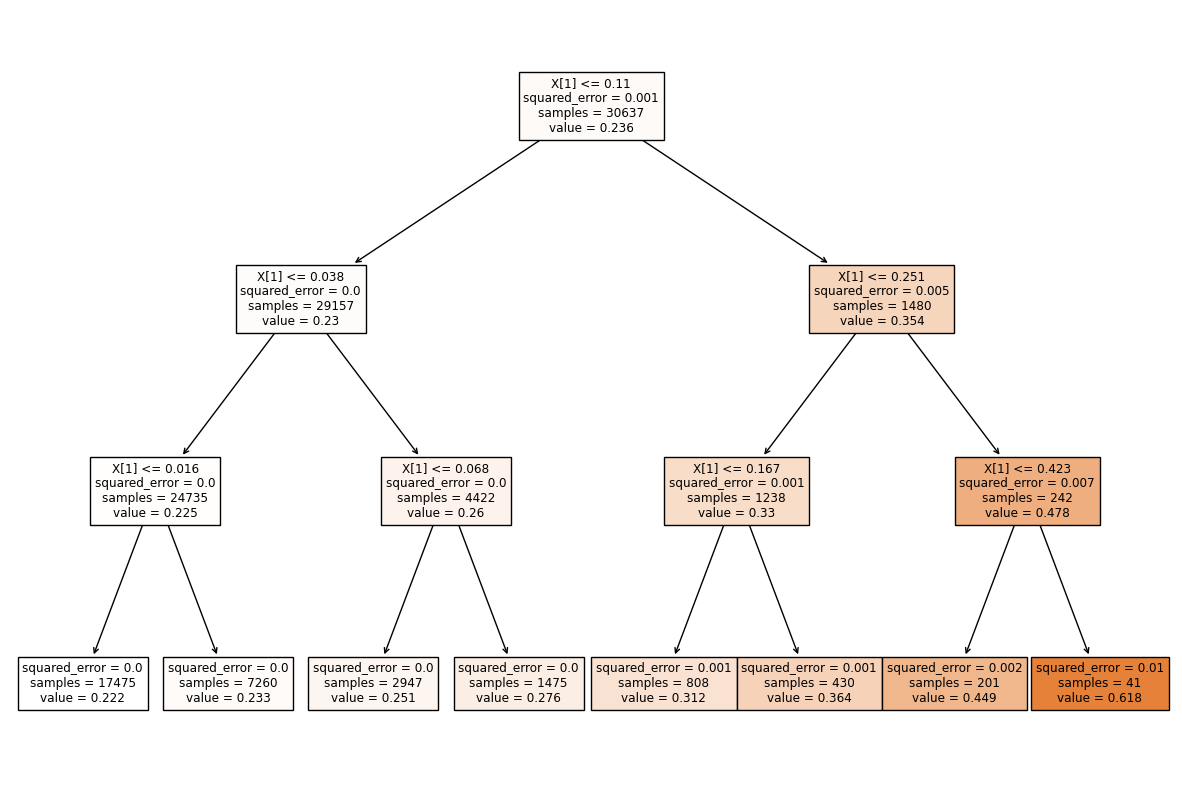

In [104]:
dct = DecisionTreeRegressor(max_depth=3).fit(X_train,y_train)

plt.figure(figsize=(15,10))
tree.plot_tree(dct, filled=True) 
plt.show(True)

In [105]:
BaggingRegressorBootstrap_results =[]
y_pred = BaggingRegressor(base_estimator=SVR(), n_estimators=10, n_jobs= -1).fit(X_train,y_train).predict(X_test)
print("Mean squared error - Bagging: %.2f" % mean_squared_error(y_test, y_pred))
print("R Score - Bagging: %.2f" % r2_score(y_test, y_pred))
print("Mean Absolute Error %.2f"% mean_absolute_error(y_test, y_pred))
print("Mean Absolute Percentage Error %.2f"% mean_absolute_percentage_error(y_test, y_pred))
BaggingRegressorBootstrap_results.append(mean_squared_error(y_test, y_pred))
BaggingRegressorBootstrap_results.append(r2_score(y_test, y_pred))
BaggingRegressorBootstrap_results.append(mean_absolute_error(y_test, y_pred))
BaggingRegressorBootstrap_results.append(mean_absolute_percentage_error(y_test, y_pred))

# Pasting é um Bagging sem reposição de exemplos (bootstrap=False)
BaggingRegressor_results = []
y_pred = BaggingRegressor(base_estimator=SVR(), n_estimators=10, bootstrap=False, n_jobs=-1).fit(X_train,y_train).predict(X_test)
print("\nMean squared error - Pasting: %.2f" % mean_squared_error(y_test, y_pred))
print("R Score - Pasting: %.2f" % r2_score(y_test, y_pred))
print("Mean Absolute Error %.2f"% mean_absolute_error(y_test, y_pred))
print("Mean Absolute Percentage Error %.2f"% mean_absolute_percentage_error(y_test, y_pred))
BaggingRegressor_results.append(mean_squared_error(y_test, y_pred))
BaggingRegressor_results.append(r2_score(y_test, y_pred))
BaggingRegressor_results.append(mean_absolute_error(y_test, y_pred))
BaggingRegressor_results.append(mean_absolute_percentage_error(y_test, y_pred))

RandomForest_results = []
y_pred = RandomForestRegressor(n_estimators=100, n_jobs=-1).fit(X_train,y_train).predict(X_test)
print("\nMean squared error - Random Forest: %.2f" % mean_squared_error(y_test, y_pred))
print("R Score - Random Forest: %.2f" % r2_score(y_test, y_pred))
print("Mean Absolute Error %.2f"% mean_absolute_error(y_test, y_pred))
print("Mean Absolute Percentage Error %.2f"% mean_absolute_percentage_error(y_test, y_pred))
RandomForest_results.append(mean_squared_error(y_test, y_pred))
RandomForest_results.append(r2_score(y_test, y_pred))
RandomForest_results.append(mean_absolute_error(y_test, y_pred))
RandomForest_results.append(mean_absolute_percentage_error(y_test, y_pred))

AdaBoost_results = []
y_pred = AdaBoostRegressor(n_estimators=50).fit(X_train,y_train).predict(X_test)
print("\nMean squared error - AdaBoost: %.2f" % mean_squared_error(y_test, y_pred))
print("R Score - AdaBoost: %.2f" % r2_score(y_test, y_pred))
print("Mean Absolute Error %.2f"% mean_absolute_error(y_test, y_pred))
print("Mean Absolute Percentage Error %.2f"% mean_absolute_percentage_error(y_test, y_pred))
AdaBoost_results.append(mean_squared_error(y_test, y_pred))
AdaBoost_results.append(r2_score(y_test, y_pred))
AdaBoost_results.append(mean_absolute_error(y_test, y_pred))
AdaBoost_results.append(mean_absolute_percentage_error(y_test, y_pred))

Mean squared error - Bagging: 0.00
R Score - Bagging: -2.72
Mean Absolute Error 0.06
Mean Absolute Percentage Error 0.27

Mean squared error - Pasting: 0.00
R Score - Pasting: -2.88
Mean Absolute Error 0.06
Mean Absolute Percentage Error 0.28

Mean squared error - Random Forest: 0.00
R Score - Random Forest: 1.00
Mean Absolute Error 0.00
Mean Absolute Percentage Error 0.00

Mean squared error - AdaBoost: 0.00
R Score - AdaBoost: 0.74
Mean Absolute Error 0.02
Mean Absolute Percentage Error 0.07


In [106]:
import pandas as pd
import plotly.graph_objects as go

metric_names = ['MSE', 'R2', 'MAE', 'MAPE']
model_names = ['LinearRegression', 'Ridge', 'Lasso', 'Elastic', 'LinearSVR', 'DecisionTree', 'BaggingRegressorBootstrap', 'BaggingRegressorNoBootStrap', 'RandomForestRegressor', 'AdaBoost']
data = [LinearRegression_results, ridge_results, lasso_results, elastic_results, LinearSVR_results, DecisionTree_results, BaggingRegressorBootstrap_results, BaggingRegressor_results, RandomForest_results, AdaBoost_results]
df = pd.DataFrame(data, columns=metric_names)
df.insert(0, 'Modelo', model_names)
print(df)

menores_valores = df.min()
cores_celulas = [['#e6e600' if col != 'Modelo' and ((col == 'R2' and val ==df[col].max()) or (col != 'R2' and val == min_val)) else '#d9d9d9' for val in df[col]] for col, min_val in menores_valores.items()]
cor_texto = '#000000'
fig = go.Figure(data=[go.Table(
    header=dict(values=list(df.columns),
                fill_color='#4d4d4d',
                align='left',
                font=dict(color='white')),
    cells=dict(values=[df[col] for col in df.columns],
               fill_color = cores_celulas,
               align='left',
               font=dict(color=cor_texto)))
])
# fig.update_layout(template='plotly_dark')

fig.show()


                        Modelo       MSE        R2       MAE      MAPE
0             LinearRegression  0.000036  0.969931  0.002631  0.009995
1                        Ridge  0.000039  0.967358  0.002772  0.010407
2                        Lasso  0.001186 -0.000070  0.018891  0.071966
3                      Elastic  0.001186 -0.000070  0.018891  0.071966
4                    LinearSVR  0.001571 -0.324534  0.034176  0.139464
5                 DecisionTree  0.000005  0.995487  0.000381  0.001241
6    BaggingRegressorBootstrap  0.004418 -2.724073  0.062001  0.273772
7  BaggingRegressorNoBootStrap  0.004604 -2.881628  0.063052  0.278302
8        RandomForestRegressor  0.000003  0.997843  0.000186  0.000637
9                     AdaBoost  0.000303  0.744873  0.015575  0.067919


In [44]:
import eli5
from eli5.sklearn import PermutationImportance

model = RandomForestRegressor(n_estimators=100, n_jobs=-1)
# Calcular a importância das features
perm = PermutationImportance(model, random_state=1).fit(X, y)

# Visualizar a importância das features
eli5.show_weights(perm, feature_names=X.columns.tolist())

SymbolAlreadyExposedError: Symbol arg_max is already exposed as ().